In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [83]:
df=pd.read_csv('data.csv') # load csv to dataframe
print(df.shape)
df.head()

(1878, 9)


,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
1,1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2,2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
3,3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
4,4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [84]:
df['purchase_price']=pd.to_numeric(df['purchase_price'])
df['suggested_retail_price']=pd.to_numeric(df['suggested_retail_price'])
df['orders_quantity']=pd.to_numeric(df['orders_quantity'])
df['sales_quantity']=pd.to_numeric(df['sales_quantity'])
df['revenue']=pd.to_numeric(df['revenue'])
df['date']=pd.to_datetime(df['day'])

df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['weekday']=df['date'].dt.day_name()
df['year']=df['date'].dt.year
df=df.sort_values(by='date')
df.replace([np.inf, -np.inf], 0, inplace=True)

print(df.shape)
df.head()

(1878, 13)


,Unnamed: 0,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,date,month,weekday,year
1877,1877,3,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,2021-04-03,4,Saturday,2021
1872,1872,3,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,2021-04-03,4,Saturday,2021
1873,1873,3,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,2021-04-03,4,Saturday,2021
1876,1876,3,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,2021-04-03,4,Saturday,2021
1875,1875,3,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98,2021-04-03,4,Saturday,2021


In [ ]:
df

In [31]:
drop_columns=['Unnamed: 0', 'item_number', 'date']
df1=df.drop(drop_columns,axis=1)
df1.head()

,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1877,3,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,4,Saturday,2021
1872,3,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,4,Saturday,2021
1873,3,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33,4,Saturday,2021
1876,3,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77,4,Saturday,2021
1875,3,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98,4,Saturday,2021


In [41]:
df1.isna().sum()

day                         0
item_name                   0
purchase_price              0
suggested_retail_price      0
orders_quantity             0
sales_quantity              0
revenue                   952
month                       0
weekday                     0
year                        0
dtype: int64

In [42]:
df1.fillna(0, inplace=True)
df1.isna().sum()

day                       0
item_name                 0
purchase_price            0
suggested_retail_price    0
orders_quantity           0
sales_quantity            0
revenue                   0
month                     0
weekday                   0
year                      0
dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le={}
cols_to_encode=['item_name', 'weekday'] # encode the non-numeric columns 
for col in cols_to_encode:
    le[col]=LabelEncoder()
    df1[col]=le[col].fit_transform(df1[col])
df1.head()

,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1877,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1872,3,0,0.978451,1.546338,40.0,17.0,25.33,4,2,2021
1873,3,0,0.978451,1.546338,40.0,17.0,25.33,4,2,2021
1876,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1875,3,1,1.991321,3.216415,0.0,2.0,5.98,4,2,2021


In [44]:
unique_items=df1.item_name.unique() # unique items

In [ ]:
features=[]
labels=[]

In [86]:
df2=df1.loc[df1['item_name']==unique_items[0]]
print(df2.shape)
df2.head()

(626, 10)


,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1877,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1876,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1870,4,2,0.674928,1.055314,0.0,0.0,0.00,4,3,2021
1871,4,2,0.674928,1.055314,0.0,0.0,0.00,4,3,2021
1865,5,2,0.674928,1.055314,0.0,0.0,0.00,4,1,2021


In [87]:
df2.drop_duplicates()

,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1877,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1870,4,2,0.674928,1.055314,0.0,0.0,0.00,4,3,2021
1865,5,2,0.674928,1.055314,0.0,0.0,0.00,4,1,2021
1858,6,2,0.610000,0.790000,0.0,26.0,20.54,4,5,2021
1853,7,2,0.610000,0.790000,0.0,19.0,15.01,4,6,2021
...,...,...,...,...,...,...,...,...,...,...
28,5,2,0.600000,0.790000,54.0,27.0,21.27,2,2,2022
23,6,2,0.674928,1.055314,0.0,0.0,0.00,2,3,2022
16,7,2,0.640000,0.990000,0.0,10.0,9.77,2,1,2022
11,8,2,0.640000,0.990000,18.0,18.0,17.66,2,5,2022


In [82]:
feature=df2.iloc[::2, :]
feat=feature.values
feature.head()

,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1877,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1870,4,2,0.674928,1.055314,0.0,0.0,0.00,4,3,2021
1865,5,2,0.674928,1.055314,0.0,0.0,0.00,4,1,2021
1858,6,2,0.610000,0.790000,0.0,26.0,20.54,4,5,2021
1853,7,2,0.610000,0.790000,0.0,19.0,15.01,4,6,2021


In [81]:
label=df2[1:].iloc[::2, :]
lab=label['sales_quantity'].values
label.head()

,day,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue,month,weekday,year
1876,3,2,0.674928,1.055314,0.0,23.0,22.77,4,2,2021
1871,4,2,0.674928,1.055314,0.0,0.0,0.00,4,3,2021
1864,5,2,0.674928,1.055314,0.0,0.0,0.00,4,1,2021
1859,6,2,0.610000,0.790000,0.0,26.0,20.54,4,5,2021
1852,7,2,0.610000,0.790000,0.0,19.0,15.01,4,6,2021


In [92]:
# make features and labels
from tqdm import tqdm

features=[]
labels=[]

with tqdm(total=len(unique_items)) as pbar:
    for item in unique_items:
        df2=df1.loc[df1['item_name']==item]
        df2=df2.drop_duplicates()
        feature_flag=True
        for i,row in df2.iterrows():
            if feature_flag:
                sublist=[row['day'],row['item_name'],row['purchase_price'],row['suggested_retail_price'],
                    row['orders_quantity'],row['revenue'],row['month'],row['weekday'],row['year'],row['sales_quantity']]
                feature_flag=False
                continue
            else:
                features.append(sublist)
                labels.append(row['sales_quantity'])
                sublist=[]
                feature_flag=True
        pbar.update(1)

100%|██████████| 3/3 [00:00<00:00, 39.29it/s]


In [93]:
features=np.array(features)
labels=np.array(labels)
print(labels.shape)
features.shape

(468,)


(468, 10)

In [94]:
print(features[10:12])
labels[10:12]

[[2.30000000e+01 2.00000000e+00 6.30000000e-01 9.90000000e-01
  1.80000000e+01 3.35400000e+01 4.00000000e+00 0.00000000e+00
  2.02100000e+03 3.40000000e+01]
 [2.50000000e+01 2.00000000e+00 6.74927536e-01 1.05531401e+00
  0.00000000e+00 0.00000000e+00 4.00000000e+00 3.00000000e+00
  2.02100000e+03 0.00000000e+00]]


array([22., 16.])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.33, random_state=42,shuffle=True)

In [96]:
X_train.shape

(313, 10)

In [97]:
y_train.shape

(313,)

In [98]:
from sklearn.ensemble import RandomForestRegressor # fit a model
clf=RandomForestRegressor(50,n_jobs=-1)
clf.fit(X_train,y_train)
preds=clf.predict(X_test)
clf.score(X_test,y_test)

0.6636321137944755

In [99]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,preds))

4.288645161290322


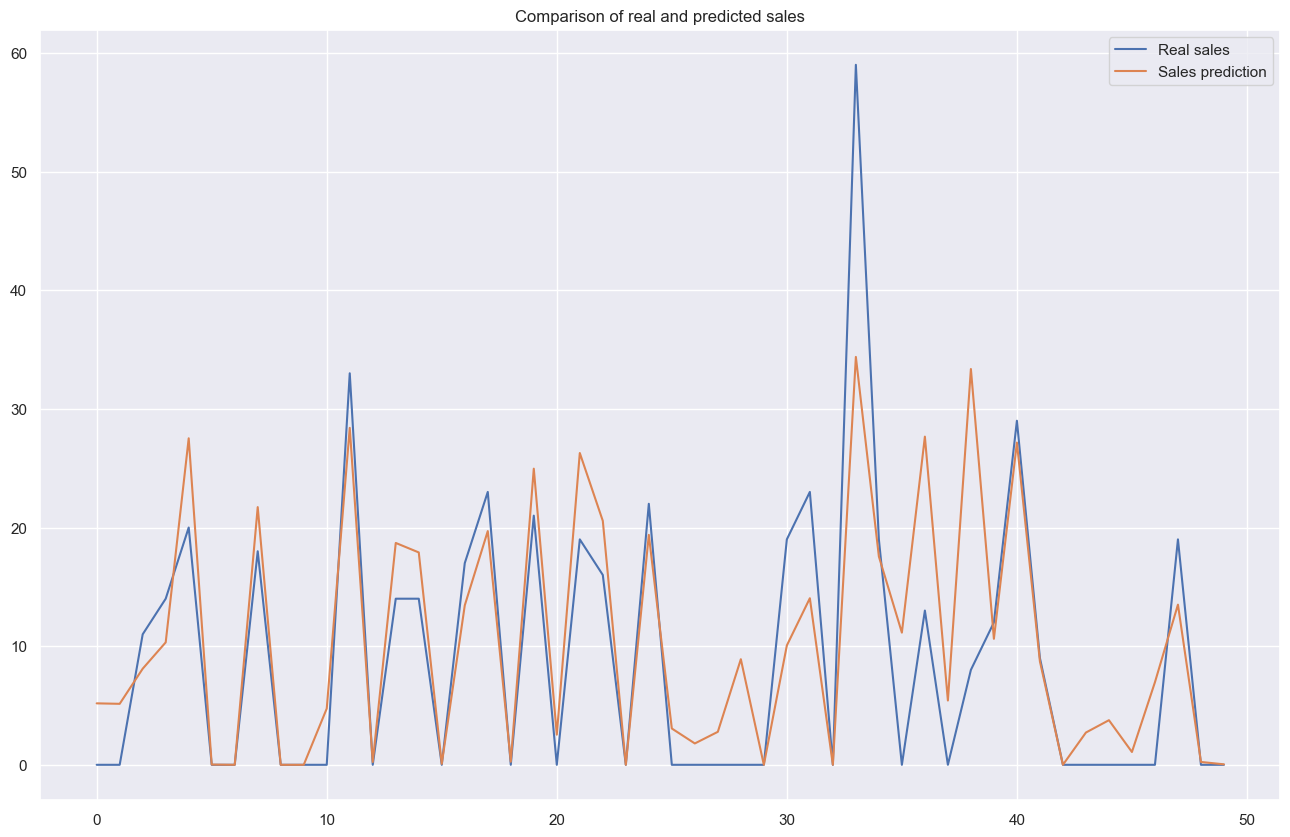

In [101]:
plt.figure(figsize=(16,10))
plt.plot(y_test[:50], label="Real sales")
plt.plot(preds[:50], label="Sales prediction")
plt.legend()
plt.title("Comparison of real and predicted sales")
plt.show()

In [102]:
feature_names=['day','item_name','purchase_price','suggested_retail_price','orders_quantity','revenue',
               'month','weekday','year','sales_quantity']

<Figure size 1600x800 with 0 Axes>

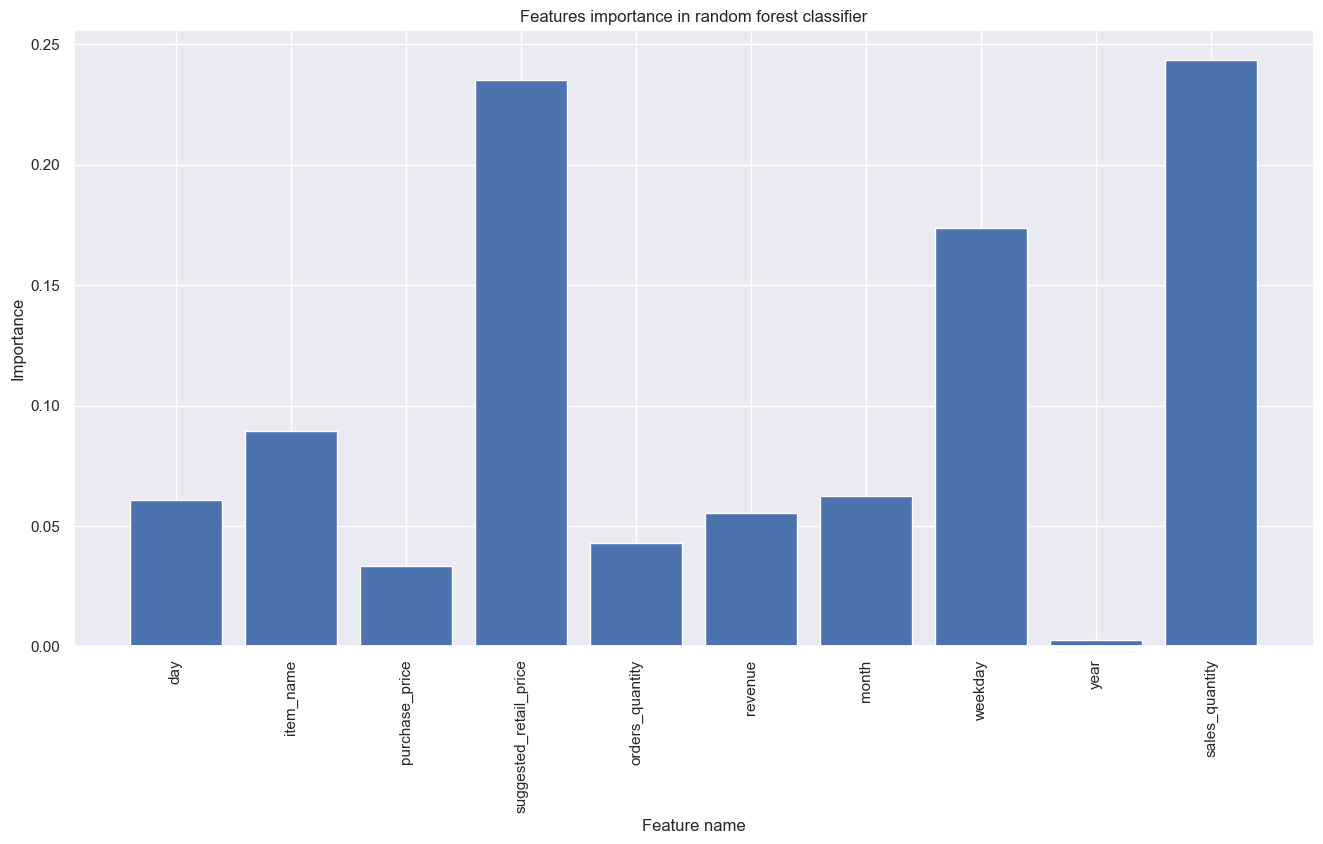

In [104]:
imp=clf.feature_importances_
plt.figure(figsize=(16,8))
plt.bar(feature_names,clf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Features importance in random forest classifier") # show feature importances
plt.xlabel("Feature name")
plt.ylabel("Importance")
plt.show()